<a href="https://colab.research.google.com/github/Hamdankim/2341720251_ML_2025/blob/main/JS06/TP_JS06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset berisi kolom umum:

age (numerik) — usia

sex (kategorikal) — male/female

bmi (numerik) — body mass index

children (numerik) — jumlah anak tanggungan

smoker (kategorikal) — yes/no

region (kategorikal) — region

charges (numerik) — target (biaya medis/person)

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

df = pd.read_csv("/content/sample_data/insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:

# Target and features
y = df['charges']
X = df.drop(columns=['charges'])

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,False,True,False,False,True
1,18,33.770,1,True,False,False,True,False
2,28,33.000,3,True,False,False,True,False
3,33,22.705,0,True,False,True,False,False
4,32,28.880,0,True,False,True,False,False


In [3]:

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print("=== Multiple Linear Regression ===")
print("R-squared:", r2_lr)
print("MSE:", mse_lr)
print("MAE:", mae_lr)


=== Multiple Linear Regression ===
R-squared: 0.7835929767120722
MSE: 33596915.851361476
MAE: 4181.194473753651


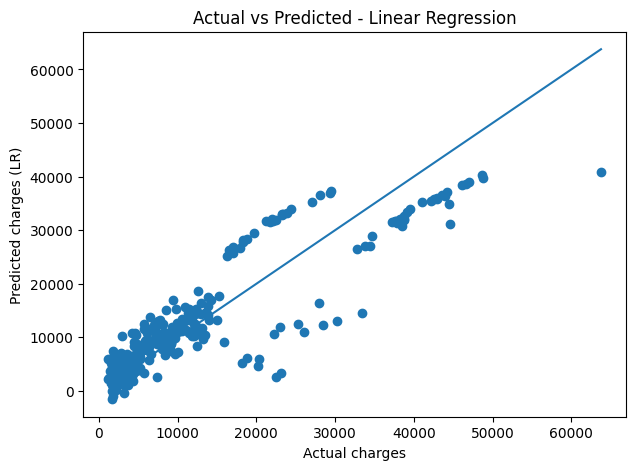

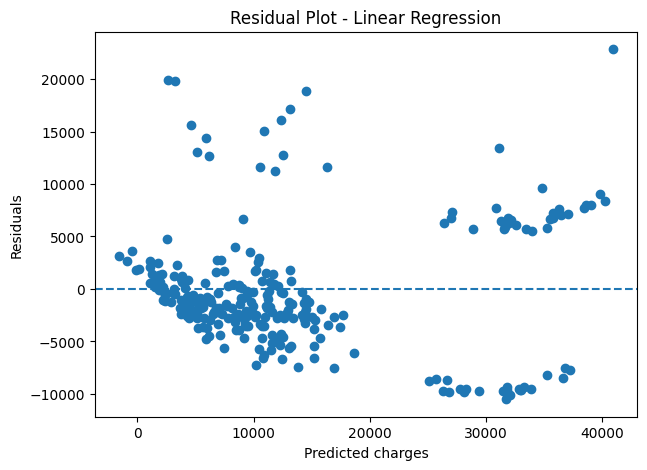

In [4]:

plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges (LR)")
plt.title("Actual vs Predicted - Linear Regression")
plt.show()

# Residual plot
residuals = y_test - y_pred_lr
plt.figure(figsize=(7,5))
plt.scatter(y_pred_lr, residuals)
plt.axhline(0, linestyle='--')
plt.xlabel("Predicted charges")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression")
plt.show()


In [5]:

svr = SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

print("=== Support Vector Regression (SVR) ===")
print("R-squared:", r2_score(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("MAE:", mean_absolute_error(y_test, y_pred_svr))


=== Support Vector Regression (SVR) ===
R-squared: 0.24534316665782363
MSE: 117159516.08797158
MAE: 5868.890476887904


Analisis singkat hasil

R-squared ≈ 0.78 menandakan model linear menjelaskan ~78% variansi biaya. Ini cukup baik untuk masalah biaya medis sederhana—tetapi masih ada bagian variansi yang tidak ditangkap (22% tersisa).

Dari scatter Actual vs Predicted terlihat bahwa model linear memprediksi cukup baik untuk rentang biaya rendah–menengah, tetapi cenderung kurang akurat untuk beberapa kasus dengan biaya sangat tinggi (outliers). Hal ini terlihat juga dari residuals besar untuk beberapa titik.

Residual plot menunjukkan pola (bukan murni acak) — ini mengindikasikan kemungkinan non-linearitas atau interaksi fitur yang belum ditangkap model linear sederhana.

Fitur kategorikal (terutama smoker) biasanya memiliki pengaruh besar terhadap charges — bisa diperiksa koefisien model (saya bisa tampilkan jika Anda mau).